In [244]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from Models.functions.utils import listProblems
from Models.functions.plot import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [245]:
from pprint import pprint

In [246]:
baseline1 = '../baseline1/Reports_v2_balanced/'
baseline2 = '../baseline2/Reports/'
baseline3 = '../baseline3/Reports/'


In [247]:
import os

In [271]:
!ls {baseline3}'/gender/b5post'

confusion_matrix.csv	 histories_cnn1.pkl	   predicted.numpy.npy
confusion_matrix.npy	 histories.pkl		   predicted_proba.numpy.npy
confusion_matrix.pdf	 plot_training.pdf	   report.csv
expected_cnn1.numpy.npy  plot_validation.pdf	   ROC_curve_class_female.pdf
expected.numpy.npy	 predicted_cnn1.numpy.npy  score_cnn1.numpy.npy


In [249]:
p = listProblems()
preds = []
for p1 in p:
    # print(p1)
    dataset = p1[1]
    lang = p1[2]
    bar = '/'
    try:
        pred = baseline2 + '/'+p1[0]+bar+ dataset +'_'+lang+bar+'predicted.numpy.npy'        
        pred = np.load(pred)
        v = 1
    except:
        try:
            pred = baseline2 + '/'+p1[0]+bar+ dataset +''+bar+'predicted.numpy.npy'
            pred = np.load(pred)
            v = 0
        except:
            pred = (0,0)
            v = None
    
        
    try:
        preds.append([p1[0],dataset,lang, v, pred.shape])
    except:
        preds.append([p1[0],dataset,lang, v, pred])
    #preds[p1[0]] = pred.shape
    
df = pd.DataFrame(preds, columns=['task','dataset','lang','version','shape'])
df.set_index('dataset')

,task,lang,version,shape
dataset,,,,
pan13,gender,en,1,"(236600,)"
pan13,gender,es,1,"(75900,)"
pan13,age,en,1,"(400800,)"
pan13,age,es,1,"(127800,)"
smscorpus,gender,en,1,"(45554, 2)"
smscorpus,age,en,1,"(53361, 3)"
brblogset,gender,pt,1,"(2482, 2)"
brblogset,age,pt,1,"(2451, 3)"
brblogset,education,pt,1,"(1504, 4)"


In [272]:
def check(dataset_name, task,v=1):
    """
    params: task
    return: dataframe
    """
    results = pd.DataFrame({'dataset': [], 'lang': [], 'task': [], 'baseline1': [], 'baseline2': [], 'baseline3': []})
    for p in listProblems(filter_dataset_name = dataset_name, filter_task = task):
        bar = '/'
        task = p[0]
        dataset_name = p[1]
        lang = p[2]
        lang2 = '_'+lang
        
        # balanced
        exp  = baseline1 + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
        pred = baseline1 + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
        exp, pred = np.load(exp), np.load(pred)
        f1_1 = f1_score(exp, pred, average="macro")
        
        lang2 = '_'+lang if v == 1 else ''        
        
        if os.path.exists(baseline2 + task +bar+ dataset_name +lang2+bar):
            exp  = baseline2 + task +bar+ dataset_name +lang2+bar+'expected.numpy.npy'
            pred = baseline2 + task +bar+ dataset_name +lang2+bar+'predicted_proba.numpy.npy'
        elif os.path.exists(baseline2 + task +bar+ dataset_name +bar):
            exp  = baseline2 + task +bar+ dataset_name +bar+'expected.numpy.npy'
            pred = baseline2 + task +bar+ dataset_name +bar+'predicted_proba.numpy.npy'
        else:
            exp  = '/tmp/'
            pred = '/tmp/'
        
        exp, pred = np.load(exp), np.load(pred)
        
        if type(pred[0]) != np.int64 and len(pred[0]) > 1:        
            pred = np.argmax(pred, axis=1)
        
        f1_2 = f1_score(exp, pred, average="macro")
        
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        exp, pred = np.load(exp), np.load(pred)
        f1_3 = f1_score(exp, pred, average="macro")

        results = results.append({'idx': dataset_name+'_'+task+'_'+lang , 'dataset': dataset_name, 'lang': lang, 'task': task, 'baseline1': f1_1, 'baseline2': f1_2, 'baseline3': f1_3}, ignore_index=True)
        
    results = results.set_index('idx')
    return results

                  baseline1  baseline2  baseline3 dataset lang    task
idx                                                                   
b5post_gender_pt   0.866651   0.625177   0.533351  b5post   pt  gender


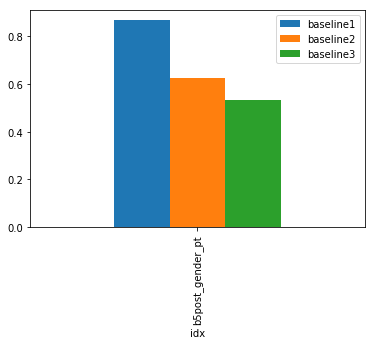

In [277]:
df = check('b5post','gender',v=1)
df.plot(kind='bar')
print(df)

                      baseline1  baseline2  baseline3  dataset lang       task
idx                                                                           
brmoral_gender_pt      0.628077   0.544545        NaN  brmoral   pt     gender
brmoral_age_pt         0.404076   0.335857        NaN  brmoral   pt        age
brmoral_religion_pt    0.406396   0.355697        NaN  brmoral   pt   religion
brmoral_education_pt   0.402892   0.306579        NaN  brmoral   pt  education
brmoral_it_pt          0.631188   0.596791        NaN  brmoral   pt         it
brmoral_politics_pt    0.491131   0.377561        NaN  brmoral   pt   politics


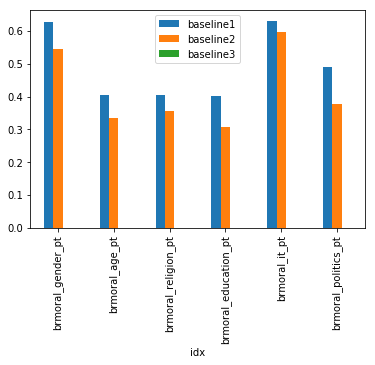

In [266]:
df = check('brmoral',None)
df.plot(kind='bar')#, figsize=(5,5))
print(df)

         baseline1  baseline2  baseline3 lang        task
dataset                                                  
esic      0.366509   0.576841        NaN   pt      gender
esic      0.580887   0.435316        NaN   pt         age
esic      0.578778   0.472374        NaN   pt   education
esic      0.533206   0.372463        NaN   pt  profession
esic      0.604788   0.277929        NaN   pt      region
esic      0.705607   0.574884        NaN   pt        city


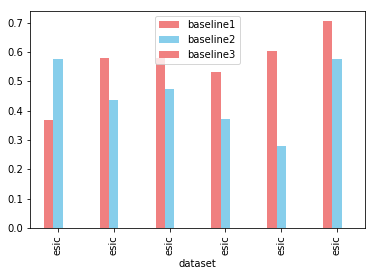

In [243]:
df = check('esic',None)
df.plot(kind='bar', color=('LightCoral','SkyBlue'))
print(df)

           baseline1  baseline2  baseline3 lang    task
dataset                                                
smscorpus   0.739435   0.575025        NaN   en  gender
smscorpus   0.657485   0.502656        NaN   en     age


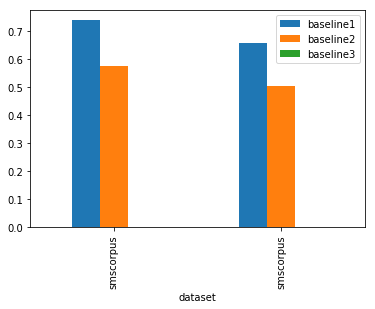

In [240]:
df = check('smscorpus',None)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
print(df)

         baseline1  baseline2  baseline3 lang    task
dataset                                              
pan13     0.575037   0.552429        NaN   en  gender
pan13     0.631629   0.558898        NaN   es  gender


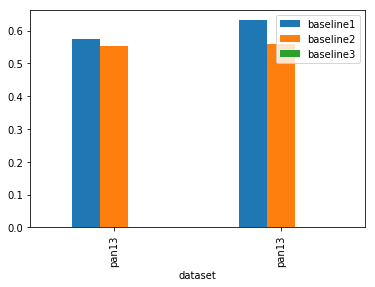

In [242]:
df = check('pan13','gender')
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
print(df)

In [71]:
from Models.functions.datasets import loadTrainTest
from sklearn.model_selection import StratifiedKFold

In [83]:
task = 'gender'
dataset_name = 'pan13'
lang = 'en'
root = '/home/rafael/Dataframe/'
X, _, y, _ = loadTrainTest(task, dataset_name, root, lang)

In [98]:
y[6], X[6]

KeyError: 6

In [85]:
K = StratifiedKFold(n_splits=3)

In [86]:
for train_index, test_index in K.split(X, y):
    pass
train_index, test_index

(array([     0,      1,      2, ..., 158025, 158026, 158027]),
 array([157399, 157401, 157402, ..., 236597, 236598, 236599]))

In [102]:
df = pd.read_csv('/home/rafael/Dataframe/pan13/gender-age_en-es_training_df.csv')

In [105]:
df = df[df.lang == 'en']

In [106]:
df.head(10)

,Unnamed: 0,age,author_id,gender,lang,text
0,215df43ae1105e88703ea4688c097932,30s,215df43ae1105e88703ea4688c097932,female,en,\n\n\t\t\tThe loops are used to protected the ...
1,45d4b8cc5eed2372fb5608afcd04fdd2,30s,45d4b8cc5eed2372fb5608afcd04fdd2,female,en,\n\n\t\t\tDo you know about the benefits of a ...
2,66a995105f86e4fe36c2f21ae2b310cd,30s,66a995105f86e4fe36c2f21ae2b310cd,male,en,\n\n\t\t\tA true friend walks in when d rest o...
3,84c0867facfba4f6a786643608966d74,20s,84c0867facfba4f6a786643608966d74,male,en,"\n\n\t\t\tAnd water, water, water, the purest ..."
4,6e0982c346b4a7e72247a396e3a4fe3c,30s,6e0982c346b4a7e72247a396e3a4fe3c,female,en,\n\n\t\t\t What's using Philippine/Filipino Tr...
7,1061e2e7d796ae2db499f8efb52e13b1,10s,1061e2e7d796ae2db499f8efb52e13b1,female,en,"\n\n\t\t\tThat being said, you canyou'll find ..."
8,9a9a3905933c5573ba6ffde0bf8610a0,20s,9a9a3905933c5573ba6ffde0bf8610a0,female,en,\n\n\t\t\tHumans have been making use of the E...
9,8acf7799c6ab273df8c08dd0969c53e,30s,8acf7799c6ab273df8c08dd0969c53e,female,en,\n\n\t\t\tYou can't say everyone has got the o...
10,3c76246dba7437e547709abb35d6e045,30s,3c76246dba7437e547709abb35d6e045,male,en,\n\n\t\t\t In the event you're significant abo...
14,d13bced2444188c70302f9fd2f9c59f,30s,d13bced2444188c70302f9fd2f9c59f,female,en,\n\n\t\t\tYou are actually projecting a vac...


In [111]:
df['gender'].values[8], df['text'].values[8]


('male',
 '\n\n\t\t\t In the event you\'re significant about wanting to start a organization, the very first issue you wish to do is take the time to know what seriously tends to make you tick. Wherever do you obtain your drive? What will get you inside a "zone?"\n<br />;\xa0\n<br />;On the other hand, there\'s lots much more to figuring out The best organization thought that will make you more money and give you more independence to love extra achievements in your own lifestyle.\n<br />;\xa0\n<br />;And accomplishment to you can be distinct than accomplishment to a person else. It may not be all about cash in any respect. It might not be about locating one thing you might be totally enthusiastic about. It might not be about acquiring a "cool" business enterprise -- the newest fad or perhaps a distinctive area of interest.\n<br />;\xa0\n<br />;Success is how you define it.\n<br />;\xa0\n<br />;Locating the right thought to carry you that success usually requires a willingness being aff